Introduction to ML on my dataset

In [1]:
import math
import pysiology as pyd
import pandas as pd
import pysiology as pysiology
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import  neurokit as nk
import neurokit2 as nk2
import matplotlib.pyplot as plt
import statistics
import heartpy as hp

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore


importing and reading the head of the processed data given by Ryan

In [3]:
ecg = pd.read_csv('./given_data/ecg.csv')
gsr = pd.read_csv('./given_data/gsr.csv')
labels = pd.read_csv('./given_data/labels.csv')

#removing unnecessary columns from data and concatenating into one dataset

gsr.drop(['gfgb'], axis=1,inplace=True)
ecg = ecg[['maxRR','minRR','meanRR','medianRR']]

dataset = pd.concat([ecg,gsr,labels], axis=1, join='inner').sort_index()
dataset.dropna()
dataset.head()


,maxRR,minRR,meanRR,medianRR,mean,variance,standard deviation,number of peaks,number of valleys,max,min,ratio of peak to time,labels
0,3.283373,-3.153124,-0.691292,-0.473422,-0.887344,-0.852428,-1.101827,-1.146055,-1.211860,-0.971536,0.473535,-1.240391,1
1,-0.530691,0.220757,-0.097092,-0.060457,1.728917,0.115263,0.413781,0.225144,0.150496,1.275972,1.869222,0.439346,0
2,-0.256929,0.437686,0.543713,0.614798,-0.219067,-0.241879,0.038038,0.613467,0.536314,-0.453982,-1.301779,1.602390,0
3,0.000886,0.828158,1.557349,1.368181,1.520551,0.954914,1.091541,0.643759,0.566410,1.668803,0.274025,0.478224,3
4,-0.153271,0.266695,0.508760,0.553411,-1.314357,-0.838620,-1.044152,-0.255806,-0.327352,-1.237303,-0.186352,-0.860474,1


Looking at the ecg plots

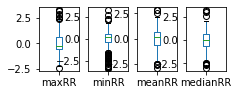

In [4]:
ecg.plot(kind='box', subplots=True, layout=(3,7), sharex=False, sharey=False)
pyplot.show()

Looking at the gsr plots

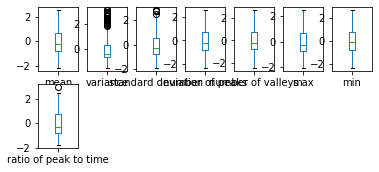

In [5]:
gsr.plot(kind='box', subplots=True, layout=(3,7), sharex=False, sharey=False)
pyplot.show()

Now looking for dataset

In [6]:
X = dataset.drop('labels', axis=1)
y = dataset['labels']

Random Forest

In [7]:
rfc = RandomForestClassifier(n_estimators=500)
y_pred = cross_val_predict(rfc, X,y, cv=10)
print(classification_report(y, y_pred))



              precision    recall  f1-score   support

           0       0.56      0.59      0.57        78
           1       0.57      0.64      0.61        78
           2       0.58      0.47      0.52        78
           3       0.75      0.76      0.75        78

    accuracy                           0.62       312
   macro avg       0.62      0.62      0.61       312
weighted avg       0.62      0.62      0.61       312



SVM

In [8]:
clf = svm.SVC()
y_pred = cross_val_predict(clf, X,y, cv=10)
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.50      0.49        78
           1       0.53      0.58      0.55        78
           2       0.46      0.47      0.47        78
           3       0.75      0.63      0.69        78

    accuracy                           0.54       312
   macro avg       0.56      0.54      0.55       312
weighted avg       0.56      0.54      0.55       312



Now doing both Random Forest and SVM but now with the eye tracking data provided

In [9]:
ecg = pd.read_csv('./given_data/ecg.csv')
gsr = pd.read_csv('./given_data/gsr.csv')
labels = pd.read_csv('./given_data/labels.csv')

#removing unnecessary columns from data and concatenating into one dataset

gsr.drop(['gfgb'], axis=1,inplace=True)
ecg = ecg[['maxRR','minRR','meanRR','medianRR']]
eyes = pd.read_csv('./given_data/eye.csv')
dataset = pd.concat([ecg,gsr,eyes,labels], axis=1, join='inner').sort_index()
dataset.dropna()
X = dataset.drop('labels', axis=1)
y = dataset['labels']


clf = svm.SVC()
y_pred = cross_val_predict(clf, X,y, cv=10)
print("SVM classification report")
print(classification_report(y, y_pred))

rfc = RandomForestClassifier(n_estimators=1000)
y_pred = cross_val_predict(rfc, X,y, cv=10)
print("Random Forest classification report")
print(classification_report(y, y_pred))


SVM classification report
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        78
           1       0.71      0.77      0.74        78
           2       0.71      0.73      0.72        78
           3       0.78      0.74      0.76        78

    accuracy                           0.73       312
   macro avg       0.74      0.73      0.73       312
weighted avg       0.74      0.73      0.73       312

Random Forest classification report
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        78
           1       0.74      0.78      0.76        78
           2       0.70      0.72      0.71        78
           3       0.80      0.81      0.80        78

    accuracy                           0.76       312
   macro avg       0.76      0.76      0.76       312
weighted avg       0.76      0.76      0.76       312



Now importing classes to process own raw data


In [4]:
import pickle 
import os
from os import listdir

data = []
# Getting all the files in the data directory
files = os.listdir("./raw_data/")
removed = ['101_PreProcessed_GSR_ECG.dat', '102_PreProcessed_GSR_ECG.dat', '103_PreProcessed_GSR_ECG.dat', '115_PreProcessed_GSR_ECG.dat', '118_PreProcessed_GSR_ECG.dat', '121_PreProcessed_GSR_ECG.dat', '119_PreProcessed_GSR_ECG.dat', '130_PreProcessed_GSR_ECG.dat']

for item in removed:
    files.remove(item)

for i in range(len(files)):
    infile = open("./raw_data/" + files[i],'rb')
    data.append(pickle.load(infile))
    infile.close()

# Extracting all data (labels, ecg and gsr data) into seperate arrays.

completeLabels = []
completeEcg = []
completeGsr = []

# Iterate over all files
for i in range(len(data)):
    del data[i]['Data'][0]
    del data[i]['Labels'][0]
    features = data[i]['Data']
    labels = data[i]['Labels']
    #Iterate over all examples in file
    for x in range(len(labels)):
        completeLabels.append(labels[x])
        completeEcg.append(features[x][:][:,1])
        completeGsr.append(features[x][:][:,0])


labelslen = len(completeLabels)
ecglen = len(completeEcg)
gsrlen = len(completeGsr)
print(f"Completed:{labelslen} lables, {ecglen} ECG inputs, {gsrlen} GSR inputs")

Completed:312 lables, 312 ECG inputs, 312 GSR inputs


Using NeuroKit to extract data points

In [ ]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13
# Preprocess the data (filter, find peaks, etc.)

for index, ecg in enumerate(completeEcg): #loops through all 398 data items from the extracted items
    try:
        processed_ecg, info = nk.ecg_process(ecg, sampling_rate=1000) #extracts processes the raw ecg signals
        if index == 0:
            compecgdata = nk.ecg_intervalrelated(processed_ecg) # makes a dataframe of analyzed ECG features
        else:
            compecgdata = pd.concat([compecgdata,nk.ecg_intervalrelated(processed_ecg)])
    except:
        print(f"Error at {index}") #throwing errors for some data items, prints index of the items

compecgdata.to_csv("./processed_data/ecg.csv",index=False)
print(compecgdata.head())

Error at 0
Error at 1
Error at 2
Error at 3
Error at 4
Error at 5
Error at 6
Error at 7
Error at 8
Error at 9
Error at 10
Error at 11
Error at 12
Error at 13
Error at 14
Error at 15
Error at 16
Error at 17
Error at 18
Error at 19
Error at 20
Error at 21
Error at 22
Error at 23
Error at 24
Error at 25
Error at 26
Error at 27
Error at 28
Error at 29
Error at 30
Error at 31
Error at 32
Error at 33
Error at 34
Error at 35
Error at 36
Error at 37
Error at 38
Error at 39
Error at 40
Error at 41
Error at 42
Error at 43
Error at 44
Error at 45
Error at 46
Error at 47
Error at 48
Error at 49
Error at 50
Error at 51
Error at 52
Error at 53
Error at 54
Error at 55
Error at 56
Error at 57
Error at 58
Error at 59
Error at 60
Error at 61
Error at 62
Error at 63
Error at 64
Error at 65
Error at 66
Error at 67


Error


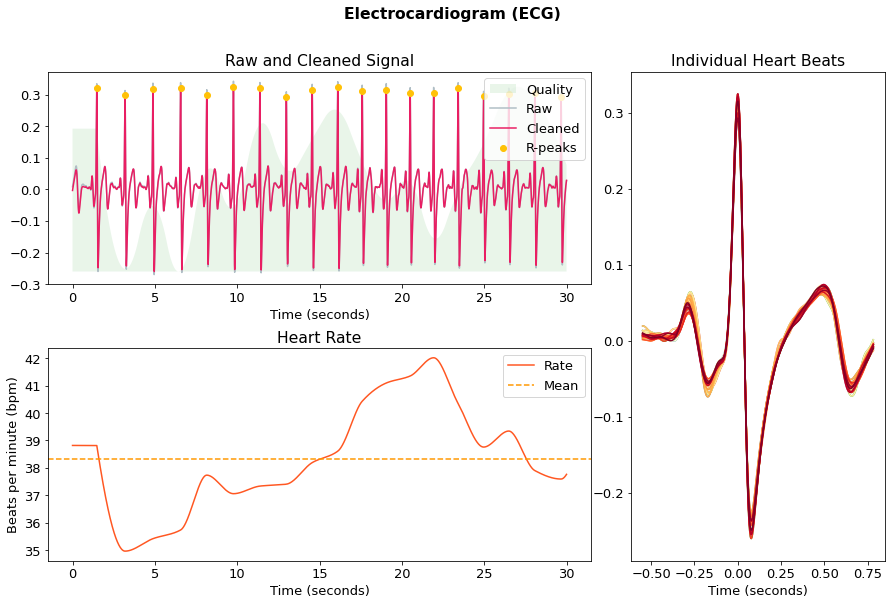

In [6]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13

try:
    arr = completeEcg[5]
    samplerate = 1000

    sig = hp.filter_signal(arr, 10, samplerate)#filter the signal with a cutoff at 2.5Hz and a 5th order Butterworth filter
    ecg_signals, info = nk2.ecg_process(sig, sampling_rate=1000)
    plot = nk2.ecg_plot(ecg_signals[:30000], sampling_rate=1000)
     #extracts processes the raw ecg signals
    #compecgdata = nk2.ecg_intervalrelated(processed_ecg, sampling_rate=1000) # makes a dataframe of analyzed ECG features
    # Process the signal using previously defined function
    #plot = nk.ecg_plot(processed_ecg[:30000], sampling_rate=1000)
    print(compecgdata)
    # Visualize
    #plot = nk.ecg_plot(compecgdata)
except:
    print(f"Error")

Since the previous function gives an incorrect bpm for unknown reason i will be using pysiology instead of neurokit to extract the results

In [36]:
processed_ecg = pyd.electrocardiography.analyzeECG(completeEcg[5],samplerate=1000,preprocessing=True)
print(processed_ecg)

{'ibi': 747.2597402597403, 'bpm': 80.39404077002327, 'sdnn': 171.34360071124468, 'sdsd': 251.58485541506005, 'rmssd': 75070.37429269424, 'pnn50': 0.41865509761388287, 'pnn20': 0.4403470715835141, 'pnn50pnn20': 0.9507389162561576, 'frequencyAnalysis': {'LF': 6.50502351801256e-08, 'HF': 2.895757233437994e-07, 'VLF': 2.1547154870377583e-08}, 'frequencyAnalysisFiltered': {'LF': 6.50502351801256e-08, 'HF': 2.895757233437994e-07, 'VLF': 2.1547154870377583e-08}}


The above code demonstrates the difference in both packages and below i will try and fix this

In [ ]:
for index, ecg in enumerate(completeEcg): #loops through all 398 data items from the extracted items
    try:
        processed_ecg = pyd.electrocardiography.analyzeECG(ecg,samplerate=1000) #extracts processes the raw ecg signals
        if index == 0:
            compecgdata = processed_ecg # makes a dataframe of analyzed ECG features
        else:
            compecgdata.append(processed_ecg)
    except:
        print(f"Error at {index}") #throwing errors for some data items, prints index of the items

compecgdata.to_csv("./processed_data/ecg.csv",index=False)
print(compecgdata.head())

In [ ]:
Manually getting the features of the GSR data as the package doesnt provide very useful features

In [ ]:
processed_gsr,infos = nk.eda_process(completeGsr[15],sampling_rate=1000) #processes the GSR, currently only doing one item to make sure it works properly
plot = nk.eda_plot(processed_gsr[:30000], sampling_rate=1000) #plots the signal on a graph

gsr_dict = nk.eda_findpeaks(processed_gsr) #finding peaks, time of the peaks and magnitude of peaks

peaktime = gsr_dict['SCR_Peaks'] #time of peaks
numpeaks = len(peaktime) #number of peaks
timebetween = []
lastPeak = 0;
for peaks in peaktime: # going through all the peaks in the exrtacted data
    if lastPeak != 0:
        timebetween.append(peaks-lastPeak) #finding the time between the peaks
    else:
        lastPeak = peaks
meantbpeaks = statistics.mean(timebetween) #mean time between peaks
mediantbpeaks = statistics.median(timebetween) # median time between peaks
meanheightpeaks = statistics.mean(gsr_dict['SCR_Height']) #mean magnitide of peaks
medianheightpeaks = statistics.median(gsr_dict['SCR_Height']) #median magnitide of peaks
varheightpeaks = statistics.variance(gsr_dict['SCR_Height']) #variance magnitide of peaks

d = {'number of peaks':numpeaks,
     'mean time between peaks':meantbpeaks,
     'median time between peaks':mediantbpeaks,
     'mean height of peaks': meanheightpeaks,
     'median height of peaks': medianheightpeaks,
     'variance height of peaks': varheightpeaks}
#adding to dataframe to be stored as csv later
procecssed_gsr = pd.DataFrame(d, index=[0])

print(procecssed_gsr)
#print(gsr_dict)
#print(completeGSRData)

In [13]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13
# Preprocess the data (filter, find peaks, etc.)

processed_ecg, info = nk.ecg_process(completeEcg[0], sampling_rate=1000)

compecgdata = pd.DataFrame()
compecgdata.append(nk.ecg_intervalrelated(processed_ecg))
print("f")

f


Ryans code for feature extraction of ecg and gsr


In [ ]:
#Function to extract features from an ECG signal.

def ECGFeatures(ecg):
    sr = 1000 #samplerate in Hz
    temp = []

    #Filter the signal
    sig = hp.filter_signal(ecg, 10, sr)

    rr_index=[]
    rr_diff=[]

    #Calculate RR
    def calcRR(sigRR):
        enhanced = hp.enhance_peaks(sigRR, iterations=3)
        enhanced_data, measures = hp.process(enhanced, sr)

        for peak in enhanced_data['peaklist']:
            if sigRR[peak] > 0:
                rr_index.append(peak)

    calcRR(sig)
    if len(rr_index) < 2:
        rr_index=[]
        sig = hp.filter_signal(ecg, 5, 1000)
        calcRR(sig)

    for x in range(len(rr_index)-1):
        rr_diff.append(rr_index[x+1]-rr_index[x])

    #MaxRR, MinRR
    MaxRR = max(rr_diff)
    MinRR = min(rr_diff)

    #MeanRR, MedianRR
    MeanRR = statistics.mean(rr_diff)
    MedianRR = statistics.median(sorted(rr_diff))

    temp.append(MaxRR)
    temp.append(MinRR)
    temp.append(MeanRR)
    temp.append(MedianRR)

    #Extract the Features
    res = pysiology.electrocardiography.analyzeECG(sig,sr)

    #Append all features extracted from pysiology library
    temp.append(res['ibi'])
    temp.append(res['bpm'])
    temp.append(res['sdnn'])
    temp.append(res['sdsd'])
    temp.append(res['rmssd'])
    temp.append(res['pnn50'])
    temp.append(res['pnn20'])
    temp.append(res['pnn50pnn20'])
    temp.append(res['frequencyAnalysis']['LF'])
    temp.append(res['frequencyAnalysis']['HF'])
    temp.append(res['frequencyAnalysis']['VLF'])
    temp.append(res['frequencyAnalysisFiltered']['LF'])
    temp.append(res['frequencyAnalysisFiltered']['HF'])
    temp.append(res['frequencyAnalysisFiltered']['VLF'])

    #Append the maximumn, minimum and mean of the signal
    temp.append(max(sig))
    temp.append(min(sig))
    temp.append(statistics.mean(sig))

    return temp

#Function to extract features from an GSR signal.


def GSRFeatures(gsr):
    #Filter the Signal
    gsr = hp.filter_signal(gsr, 0.1, 1000)

    #Average
    avg = statistics.mean(gsr)

    #Variance
    temp=0
    for x in gsr:
        temp = temp + (x-avg)**2
    var = temp/len(gsr)

    #Standard deviation of Skin conductance
    std = math.sqrt(var)

    #The number of local maxima and minima
    peaks = signal.find_peaks(gsr)
    valleys = signal.find_peaks(gsr*(-1))
    numPEAKS = len(peaks[0])/len(gsr)
    numVALLEYS = len(valleys[0])/len(gsr)


    ### Dont worry about this feature, its not implemented properly ###
    #Mean conductivity difference (GF − GB) for each consecutive pair of local minimum-maximum
    GFGB = 0
    if peaks == True:
        if peaks[0][0] < valleys[0][0]:
            #Find difference between peaks where peak comes first
            for x in range(len(peaks[0][1:])):
                GFGB = GFGB + (gsr[peaks[0][x]] - gsr[valleys[0][x]])
            GFGB = GFGB/len(peaks[0][1:])
        else:
            #Find difference between peaks where Valley comes first
            for x in range(len(peaks[0])):
                GFGB = GFGB + (gsr[peaks[0][x]] - gsr[valleys[0][x]])
            GFGB = GFGB/len(peaks[0])

    #Global maximum GSRmax and minimum GSRmin
    GSRmax = max(gsr)
    GSRmin = min(gsr)

    #Difference of global maximum GSRmax and minimum GSRmin
    GSRdiff = GSRmax-GSRmin

    #The ratio between the number of maxima and stimuli duration (peaks∕time)
    ratio = numPEAKS/len(gsr)

    return [avg, var, std, numPEAKS, numVALLEYS, GFGB, GSRmax, GSRmin, ratio]